**Name: Savona Shrestha**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/Classification/campusPlacement.csv')
df

,gender,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,mba_p,status
0,M,67.00,91.00,58.00,Sci&Tech,No,55.0,58.80,Placed
1,M,79.33,78.33,77.48,Sci&Tech,Yes,86.5,66.28,Placed
2,M,65.00,68.00,64.00,Comm&Mgmt,No,75.0,57.80,Placed
3,M,56.00,52.00,52.00,Sci&Tech,No,66.0,59.43,Not Placed
4,M,85.80,73.60,73.30,Comm&Mgmt,No,96.8,55.50,Placed
...,...,...,...,...,...,...,...,...,...
209,M,62.00,72.00,65.00,Comm&Mgmt,No,67.0,56.49,Placed
210,M,80.60,82.00,77.60,Comm&Mgmt,No,91.0,74.49,Placed
211,M,58.00,60.00,72.00,Sci&Tech,No,74.0,53.62,Placed
212,M,67.00,67.00,73.00,Comm&Mgmt,Yes,59.0,69.72,Placed


# 3.1 Classification

1. When and Who created the dataset?

 The dataset was created four years ago by Ben Roshan D.
2. How did you get acess to the dataset?

 The dataset was originated from Kaggle Datasets
3. List out the attributes (columns) of a dataset.

 •	Gender: The gender of a student

 •	ssc_p: The percentage of Secondary Education (10th grade) of student.

 •	hsc_p: The percentage of Higher Secondary Education (12th grade) of student.

 •	degree_p: The degree Percentage.

 •	degree_t: Under Graduation (Degree type)

 •	workex: Work experience of student

 •	etest_p: Employability test percentage conducted by college.

 •	mba_p: The percentage of MBA of student.

 •	Status: Status of placement (Placed/Not placed)



## 3.1.1. Load: Inspect and Explore your Data:

Understanding the characteristics of Data beforehand allow us to build a better model with acceptable performance. Before you begin the quest of building, training and testing of model, You must write
some code in chunks to check, preview, summarize, explore and visualize your data.

1. Load and Check the dataset: After loading the data, it is a good practise to run some checks onit. You must perform the following:

(a) Data Cleaning and find the summary statistics of the data.

(b) Explore the data with Visualization and chart.


In [ ]:
#total size and shape of the Dataframe
total_size = df.size
total_shape = df.shape
print("Total Size of the Data Frame:", total_size)
print("Shape of the Data Frame:", total_shape)

Total Size of the Data Frame: 1926
Shape of the Data Frame: (214, 9)


In [ ]:
#descriptive statistics
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,214.000000,214.000000,214.000000,214.000000,214.000000
mean,67.328178,66.372103,66.432664,72.021589,62.287804
std,10.846478,10.908057,7.318617,13.256373,5.845353
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.500000,61.000000,61.000000,60.000000,57.922500
50%,67.000000,65.000000,66.000000,70.500000,62.070000
75%,75.850000,73.000000,72.000000,83.000000,66.267500
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [ ]:
#information of Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    214 non-null    object 
 1   ssc_p     214 non-null    float64
 2   hsc_p     214 non-null    float64
 3   degree_p  214 non-null    float64
 4   degree_t  214 non-null    object 
 5   workex    214 non-null    object 
 6   etest_p   214 non-null    float64
 7   mba_p     214 non-null    float64
 8   status    214 non-null    object 
dtypes: float64(5), object(4)
memory usage: 15.2+ KB


In [ ]:
#counts missing values in each column
df.isnull().sum()

gender      0
ssc_p       0
hsc_p       0
degree_p    0
degree_t    0
workex      0
etest_p     0
mba_p       0
status      0
dtype: int64

In [ ]:
#print the count of duplicated rows
print('Duplicated :',df.duplicated().sum())

Duplicated : 0


<Axes: title={'center': 'Count of Placements based on Gender'}, xlabel='gender', ylabel='count'>

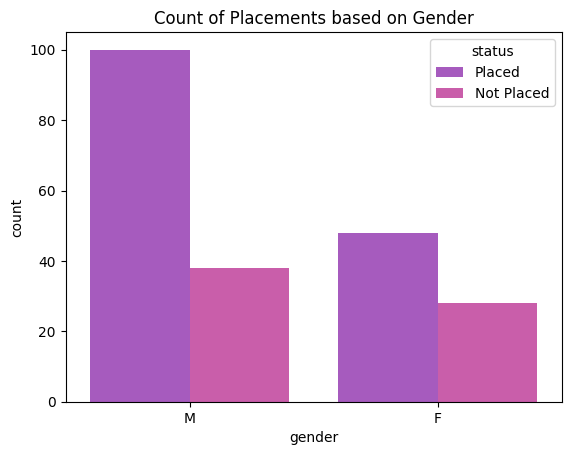

In [ ]:
#create countplot
plt.title('Count of Placements based on Gender')
sns.countplot(data=df, x= df['gender'], hue=df['status'], palette=['#AF4BCE','#DB4CB2'])

<Figure size 800x600 with 0 Axes>

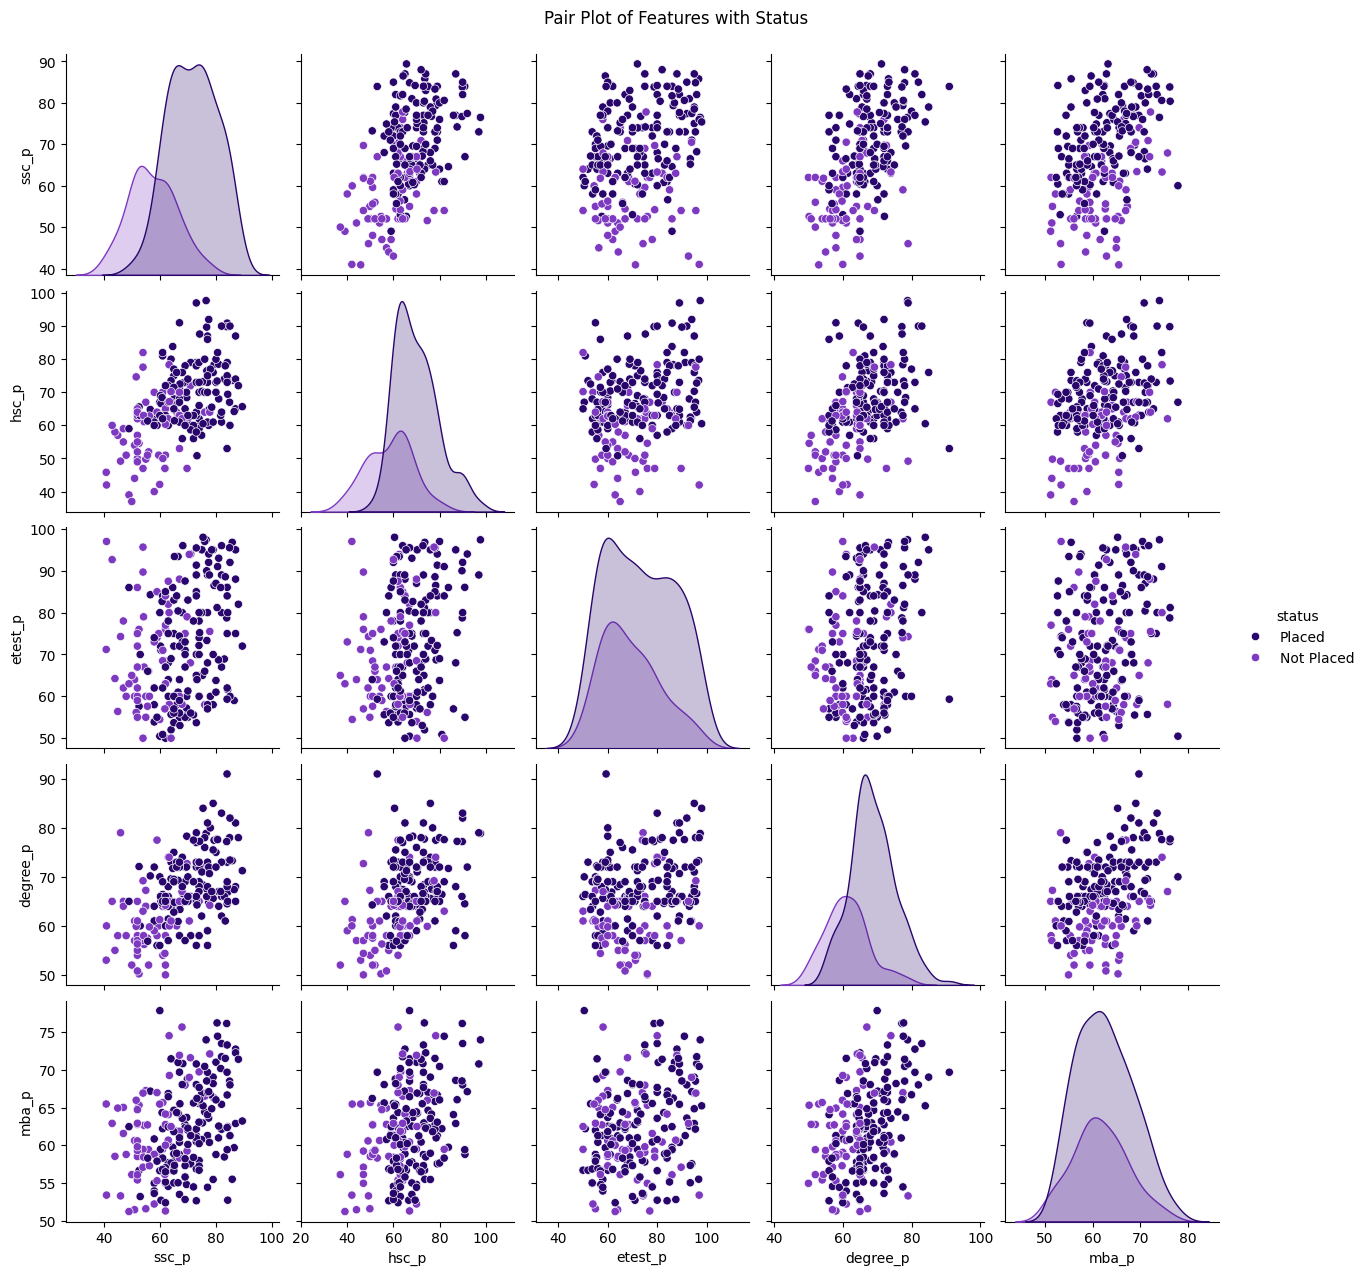

In [ ]:
#create pair plot
plt.figure(figsize=(8,6))
sns.pairplot(df[['ssc_p','hsc_p','etest_p','degree_p','mba_p','status']], hue='status', palette = ['#29066B','#7D3AC1'])
plt.suptitle('Pair Plot of Features with Status',y=1.02)
plt.show()

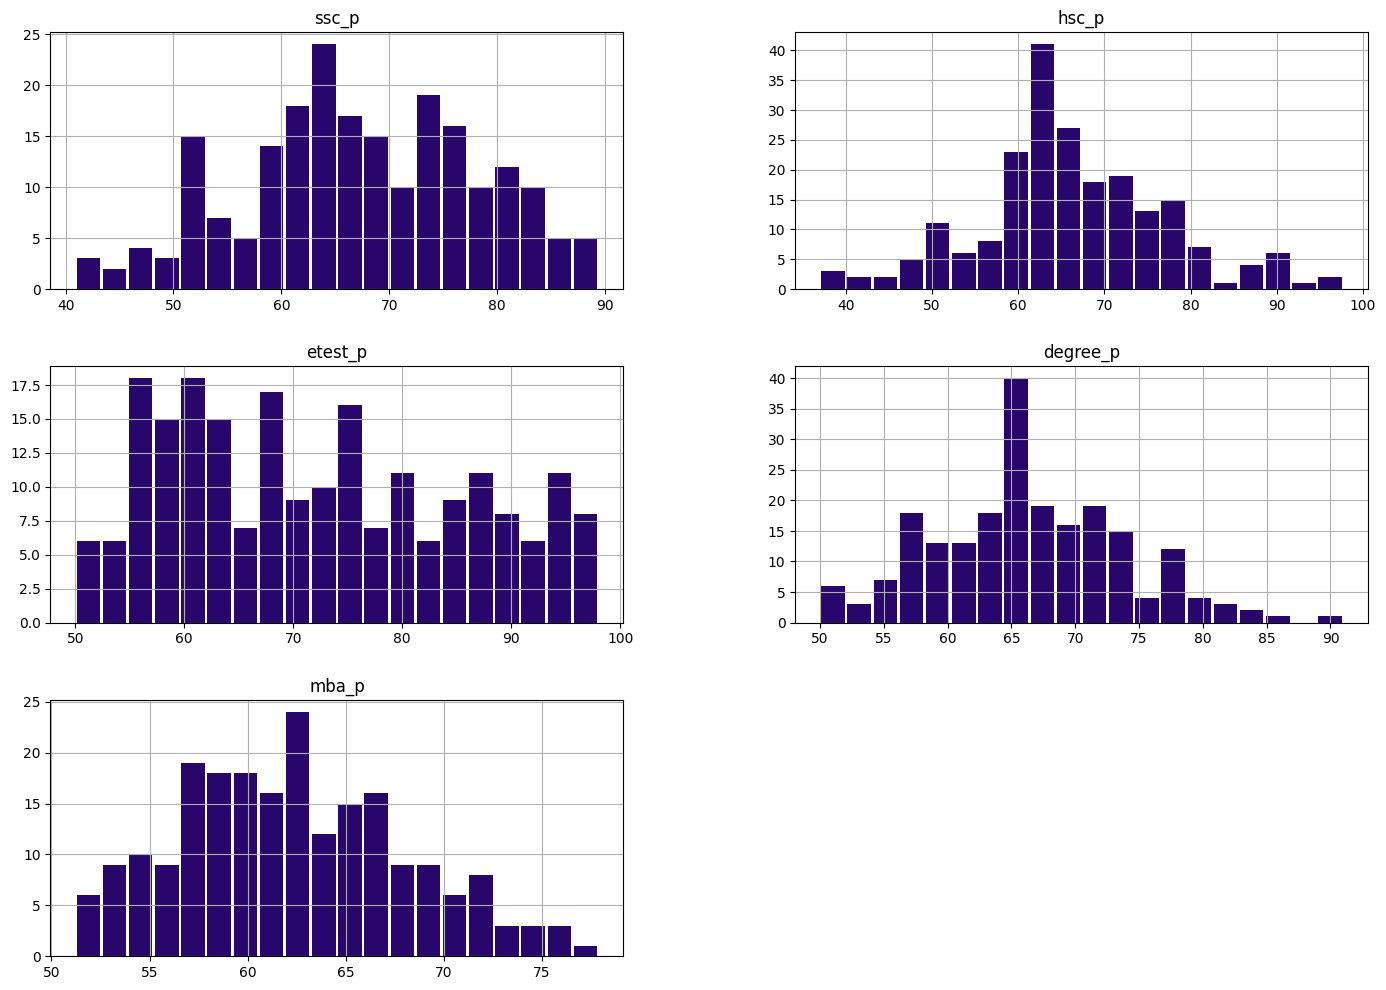

In [ ]:
#histogram of data
df[['ssc_p','hsc_p','etest_p','degree_p','mba_p']].hist(figsize=(17,12),bins=20, color='#29066B',rwidth=0.9)
plt.show()

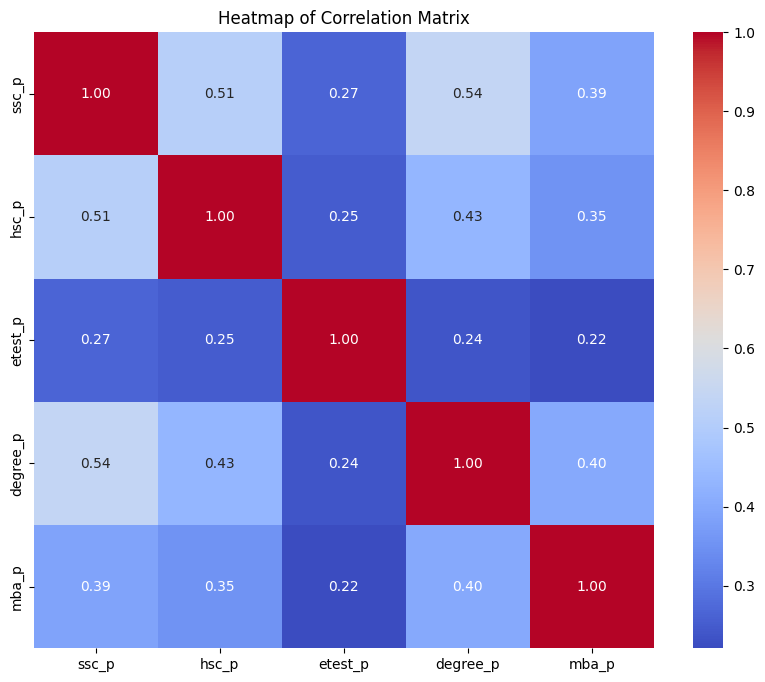

In [ ]:
#calculate correlation matrix
selected_variables = ['ssc_p','hsc_p','etest_p','degree_p','mba_p']
correlation_matrix = df[selected_variables].corr()
plt.figure(figsize=(10, 8))
#create heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

## 3.1.2. Build Primary Model

Once you have assembled your dataset and gained insights into the key characteristics of your data, it’s time to Build, Train, and Evaluate your model. For this task you must do the following:
1. Split the Dataset into Train and Test set.
2. Built at least two machine learning model for Regression Task.
3. Evaluate both model on Test Dataset.
4. Conclude: Which Model best performed in your dataset?


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

#taking 'status' is the target column
X = df.drop('status', axis=1)  # Features
y = df['status']  # Target

#enncode all categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X)

#split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

#create and train the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

#make predictions
rf_predictions = rf_model.predict(X_test)

#evaluate the model using accuracy score
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("RandomForestClassifier Accuracy:", rf_accuracy)

RandomForestClassifier Accuracy: 0.7209302325581395


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
#encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#Logistic Regression model
l_model = LogisticRegression(solver='saga', max_iter=10000)
l_model.fit(X_train, y_train_encoded)

#make predictions
l_predictions = l_model.predict(X_test)

#mvaluate the model using Mean Squared Error (MSE)
l_accuracy = accuracy_score(y_test_encoded, l_predictions)
print("Logistic Regression Accuracy:", l_accuracy)

Logistic Regression Accuracy: 0.7906976744186046


In [ ]:
best_model = "RandomForestClassifier" if rf_accuracy > l_accuracy else "Logistic Regression"
print(f"Best performing model: ", best_model)

Best performing model:  Logistic Regression


## 3.1.3. Hyper-parameter Optimization with Cross-Validation.
Hyper-parameter optimization (aka Hyper-parameter Tuning) is the process of finding the best hyperparameters value for your selected model. In this step you must perform the following:
1. Identify the various hyper-parameters of the model you used in section 3.1.2 {For both the model}.
2. Used any cross-validation techniques to find the best value of hyper-parameters selected above. {Hint:
You can use grid searchCV or randomized searchCV.
3. Conclude: The best Hyper-parameters for both the model.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import uniform

#define the hyperparameter search space
param_dist = {
    'fit_intercept': [True, False],
    'n_jobs': [i for i in range(1, 10)]
}

#perform random search
random_search = RandomizedSearchCV(l_model, param_distributions=param_dist, n_iter=5, cv=5, random_state=42, verbose=0)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_model = random_search.best_estimator_
score = best_model.score(X_test, y_test)
print("Accuracy on Test Set:", score)

Best Hyperparameters: {'n_jobs': 1, 'fit_intercept': True}
Accuracy on Test Set: 0.7906976744186046


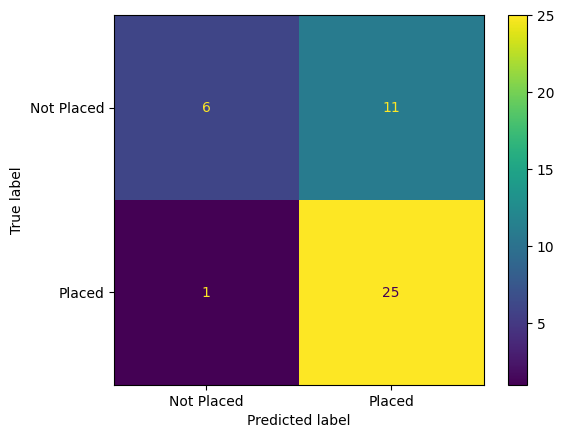

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#make predictions
pre = best_model.predict(X_test)

#generate confusion matirx
c = confusion_matrix(y_test, pre)
disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=best_model.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import randint
import pandas as pd

#define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(10, 200),          # Number of trees in the forest
    'max_depth': randint(1, 20),               # Maximum depth of the tree
    'min_samples_split': randint(2, 20),       # Minimum number to split an internal node
    'min_samples_leaf': randint(1, 20),        # Minimum number to be at a leaf node
}

#split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

#creat RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

#perform random search
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, verbose=0)
random_search.fit(X_train, y_train)

#print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

#evaluate the model with the best hyperparameters on the test set
best_model = random_search.best_estimator_
score = best_model.score(X_test, y_test)
print("Accuracy Score on Test Set:", score)

Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 7, 'min_samples_split': 19, 'n_estimators': 141}
Accuracy Score on Test Set: 0.7209302325581395


## 3.1.4. Feature Selection
In this section you must any one of the feature selection technique to select
and identify the best features.


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#set up to select all features
fs = SelectKBest(score_func=f_classif, k='all')

#study relationship from training data
fs.fit(X_train, y_train)

#transform train input data
X_train_fs = fs.transform(X_train)

#transform test input data
X_test_fs = fs.transform(X_test)

#selected feature names
selected_feature_names = X_train.columns[fs.get_support()]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'gender_F',
       'gender_M', 'degree_t_Comm&Mgmt', 'degree_t_Others',
       'degree_t_Sci&Tech', 'workex_No', 'workex_Yes'],
      dtype='object')


Feature 0: 115.893845
Feature 1: 62.186025
Feature 2: 50.022847
Feature 3: 2.200452
Feature 4: 2.792130
Feature 5: 0.786283
Feature 6: 0.786283
Feature 7: 0.652501
Feature 8: 3.389997
Feature 9: 0.004725
Feature 10: 15.476569
Feature 11: 15.476569


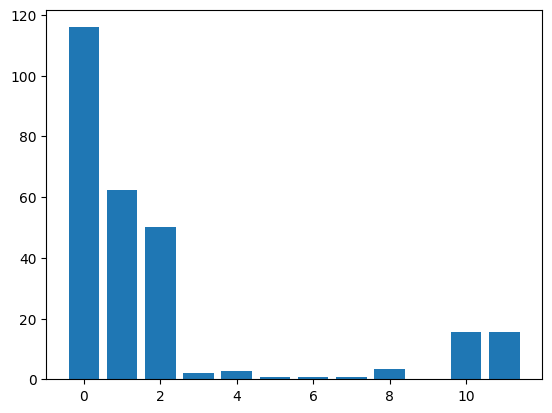

In [ ]:
from matplotlib import pyplot
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
#plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Answer: The Best Features is Secondary Higher Education.

## 3.1.5 Final Model
With the best Hyper-parameters from section 3.1.3 and selected features from 3.1.4.rebuild both the model
from section 3.1.2.


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#convert X to a pandas DataFrame
X_df = pd.DataFrame(X_encoded)

#select specific columns
columns_to_keep = ['degree_p', 'hsc_p', 'ssc_p']
X_selected = X_df[columns_to_keep]

#convert back to numpy array
X = X_selected.to_numpy()

#split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

#make predictions on the test set
rf_predictions = rf_model.predict(X_test)

#evaluate using accuracy score
accuracy = accuracy_score(y_test, rf_predictions)
print("RandomForestClassifier Accuracy:", accuracy)

RandomForestClassifier Accuracy: 0.7209302325581395
